In [1]:
# Importación de librerías
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
# Configuración general de Pandas para ver más columnas
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Comprobación de versiones
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)


Python: 3.13.5
pandas: 2.3.3
numpy: 2.3.5


## 02 - Carga de datos

En esta sección cargamos los ficheros:
- `bank-additional-limpio.csv` (campañas de marketing)
- `customer-details.xlsx` (información de clientes, hojas 2012-2013-2014)


In [2]:
# 02 - Carga de datos

# Rutas a los ficheros (desde la carpeta del proyecto)
ruta_bank = "../data/bank-additional-limpio.csv"
ruta_customers = "../data/customer-details.xlsx"

# Cargamos el CSV del banco
bank = pd.read_csv(ruta_bank, sep=";")

# Cargamos el Excel de clientes (cada hoja es un año)
clientes_2012 = pd.read_excel(ruta_customers, sheet_name="2012")
clientes_2013 = pd.read_excel(ruta_customers, sheet_name="2013")
clientes_2014 = pd.read_excel(ruta_customers, sheet_name="2014")

# Unimos todas las hojas en un solo DataFrame de clientes
clientes = pd.concat([clientes_2012, clientes_2013, clientes_2014], ignore_index=True)

In [3]:
# Exploración inicial del banco
bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

In [5]:
bank.describe (include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
count,43000.000000,37880.000000,42655,42915,41193,34019.000000,41974.000000,41974.000000,43000,43000.000000,43000.000000,43000.000000,43000.000000,43000,43000.000000,42529,43000,33744,43000,43000,42752,43000
unique,NaN,NaN,11,3,7,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,NaN,26,26,309,11,2,1825,43000
top,NaN,NaN,admin.,MARRIED,university.degree,NaN,NaN,NaN,cellular,NaN,NaN,NaN,NaN,NONEXISTENT,NaN,"93,994","-36,4","4,857","5228,1",no,28-febrero-2018,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,NaN,NaN,10873,25999,12722,NaN,NaN,NaN,27396,NaN,NaN,NaN,NaN,37103,NaN,7938,8020,2287,16980,38156,95,1
mean,20651.099047,39.977112,NaN,NaN,NaN,0.000088,0.535998,0.155620,NaN,257.739279,2.567233,962.330953,0.174023,NaN,0.077128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,11868.770913,10.437957,NaN,NaN,NaN,0.009390,0.498708,0.362499,NaN,258.666033,2.772294,187.260394,0.497366,NaN,1.573898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,17.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10381.750000,32.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20642.500000,38.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,179.000000,2.000000,999.000000,0.000000,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,30930.250000,47.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Exploración inicial de clientes
clientes.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [7]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


In [8]:
clientes.describe (include='all')

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
count,43170.000000,43170.000000,43170.000000,43170.000000,43170,43170.000000,43170
unique,NaN,NaN,NaN,NaN,NaN,NaN,43170
top,NaN,NaN,NaN,NaN,NaN,NaN,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,7916.022469,93227.389622,1.004749,0.998633,2013-05-11 22:09:47.407922176,16.591290,NaN
min,0.000000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000,NaN
25%,3597.000000,49608.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000,NaN
50%,7194.500000,93009.500000,1.000000,1.000000,2013-03-01 00:00:00,17.000000,NaN
75%,11705.750000,136740.500000,2.000000,2.000000,2014-03-28 00:00:00,25.000000,NaN
max,20114.000000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000,NaN


In [9]:
  # Eliminamos columnas que no aportan información
bank.drop(columns=['Unnamed: 0'], inplace=True)

# Confirmamos
bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [10]:
bank.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
id_                  0
dtype: int64

In [11]:
clientes.isnull().sum()

Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [12]:
bank.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate
count,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128
std,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000
25%,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000
75%,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000


In [13]:
bank.nunique()

age                  78
job                  11
marital               3
education             7
default               2
housing               2
loan                  2
contact               2
duration           1540
campaign             42
pdays                27
previous              8
poutcome              3
emp.var.rate         10
cons.price.idx       26
cons.conf.idx        26
euribor3m           309
nr.employed          11
y                     2
date               1825
id_               43000
dtype: int64

In [14]:
bank['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

In [15]:
clientes.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
count,43170.000000,43170.000000,43170.000000,43170.000000,43170,43170.000000
mean,7916.022469,93227.389622,1.004749,0.998633,2013-05-11 22:09:47.407922176,16.591290
min,0.000000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000
25%,3597.000000,49608.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000
50%,7194.500000,93009.500000,1.000000,1.000000,2013-03-01 00:00:00,17.000000
75%,11705.750000,136740.500000,2.000000,2.000000,2014-03-28 00:00:00,25.000000
max,20114.000000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000
std,5228.248885,50498.181989,0.815996,0.816008,NaN,9.241769


In [16]:
clientes.nunique()

Unnamed: 0           20115
Income               38310
Kidhome                  3
Teenhome                 3
Dt_Customer           1096
NumWebVisitsMonth       32
ID                   43170
dtype: int64

<Axes: >

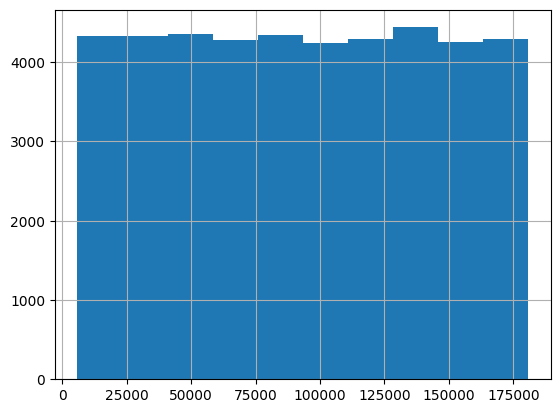

In [17]:
clientes['Income'].hist()

In [18]:
bank.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate
count,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128
std,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000
25%,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000
75%,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000


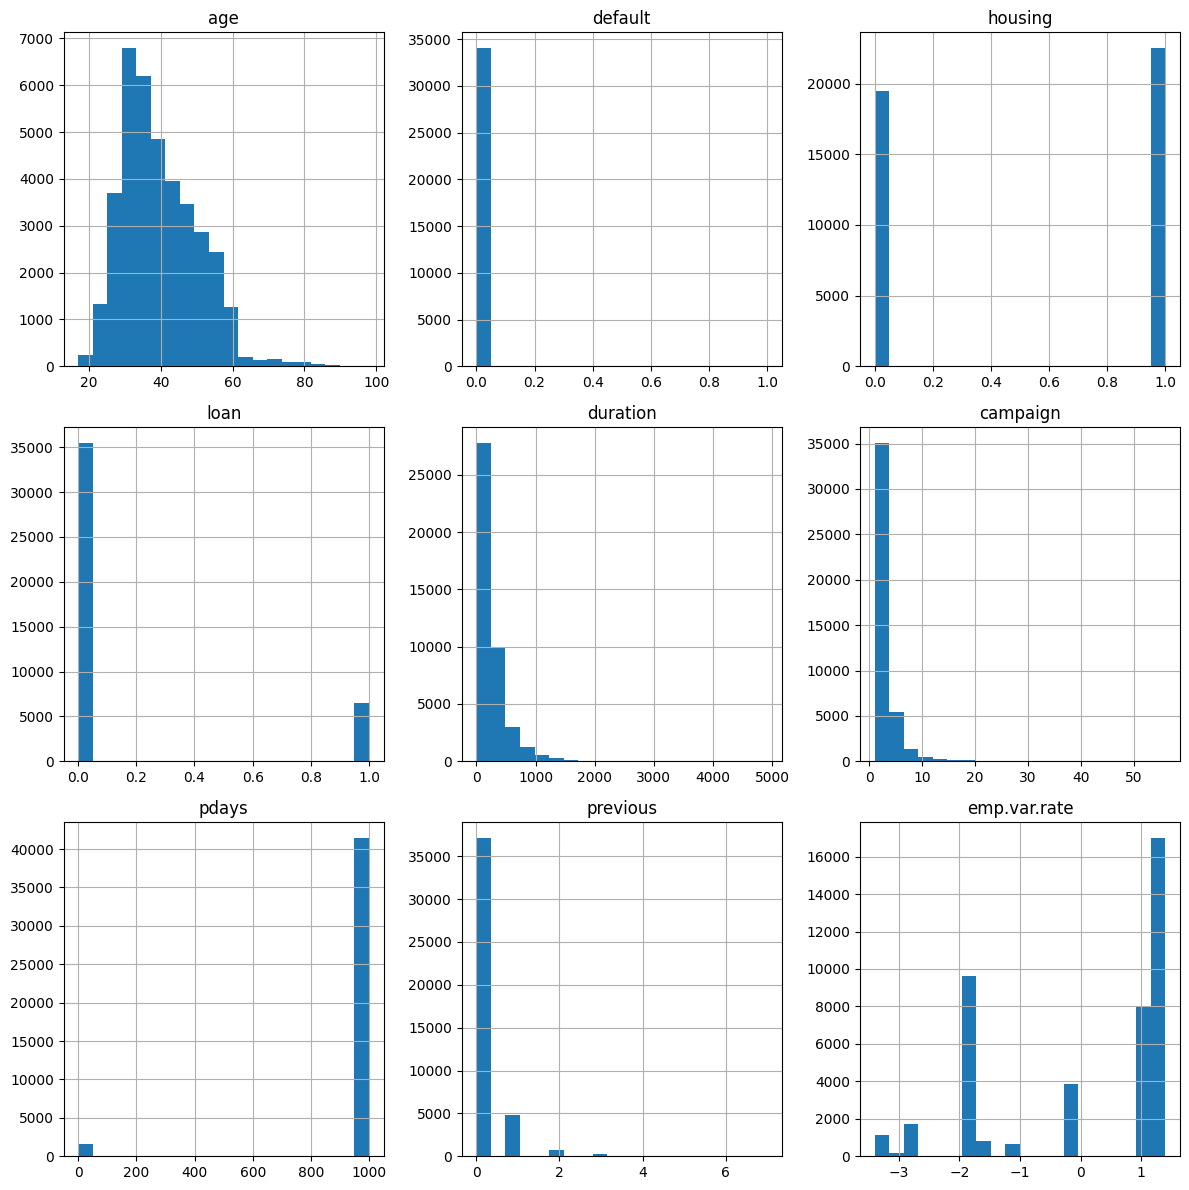

In [19]:
bank.select_dtypes(include='number').hist(bins=20, figsize=(12, 12))
plt.tight_layout()
plt.show()

In [20]:
bank.select_dtypes(include='object').nunique()

job                  11
marital               3
education             7
contact               2
poutcome              3
cons.price.idx       26
cons.conf.idx        26
euribor3m           309
nr.employed          11
y                     2
date               1825
id_               43000
dtype: int64

In [21]:
for col in bank.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(bank[col].value_counts())
    print("\n")

--- job ---
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64


--- marital ---
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64


--- education ---
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64


--- contact ---
contact
cellular     27396
telephone    15604
Name: count, dtype: int64


--- poutcome ---
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64


--- cons.price.idx ---
cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,

In [22]:
# Revisamos valores de cada columna categórica
for col in bank.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(bank[col].value_counts())


--- job ---
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

--- marital ---
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64

--- education ---
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

--- contact ---
contact
cellular     27396
telephone    15604
Name: count, dtype: int64

--- poutcome ---
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

--- cons.price.idx ---
cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075 

In [23]:
# Columnas tienen 'unknown'
for col in bank.select_dtypes(include='object').columns:
    if 'unknown' in bank[col].unique():
        print(f"Columna con 'unknown': {col}")

In [24]:
# Detectar valores extraños 
valores_raros = [v for v in bank['education'].unique() if len(str(v)) > 15]

bank['education'] = bank['education'].replace(valores_raros, 'unknown')

bank['education'].value_counts()

education
unknown        18199
high.school     9925
basic.9y        6309
basic.4y        4356
basic.6y        2386
illiterate        18
Name: count, dtype: int64

In [25]:
bank_numericas = bank.select_dtypes(include='number')

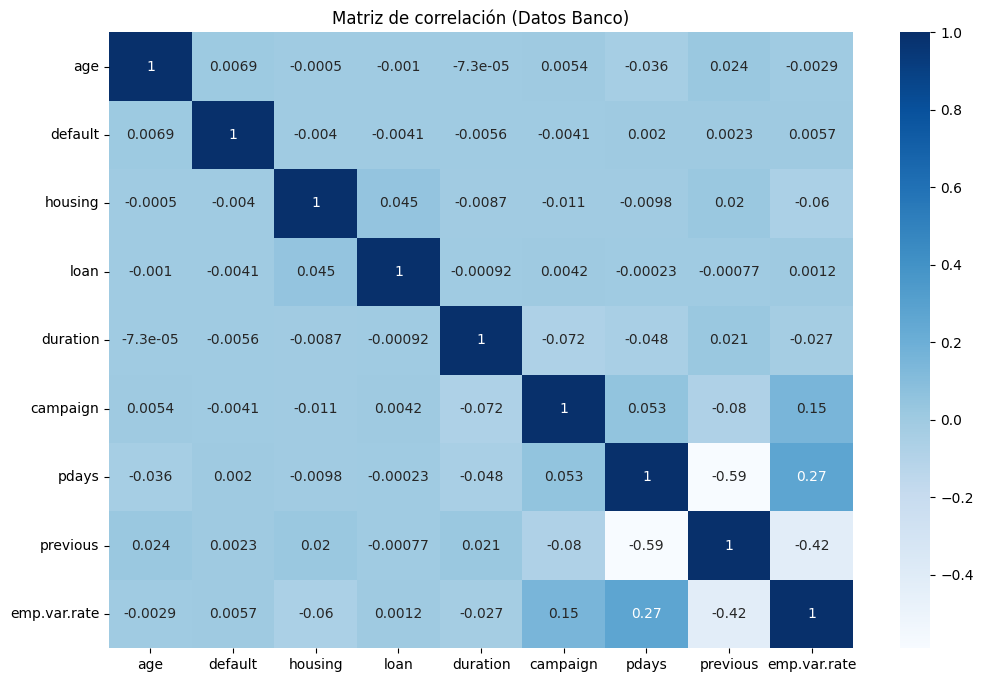

In [26]:
# Seleccionamos solo las columnas numéricas
bank_numericas = bank.select_dtypes(include='number')

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(bank_numericas.corr(), annot=True, cmap='Blues')
plt.title("Matriz de correlación (Datos Banco)")
plt.show()

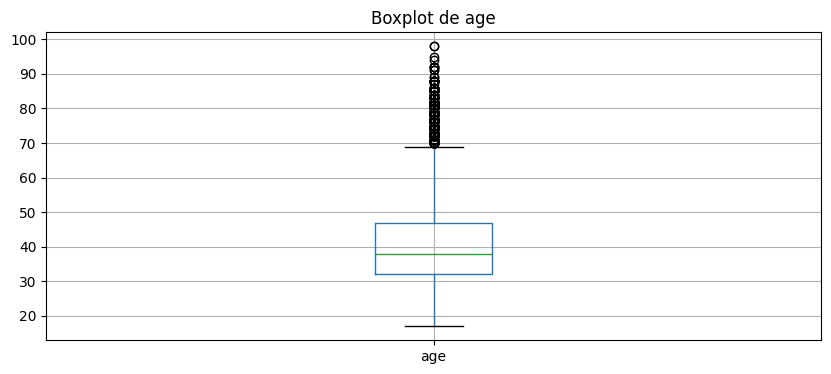

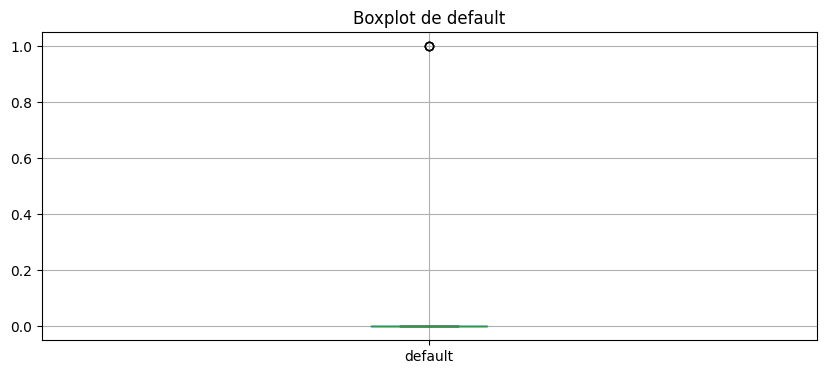

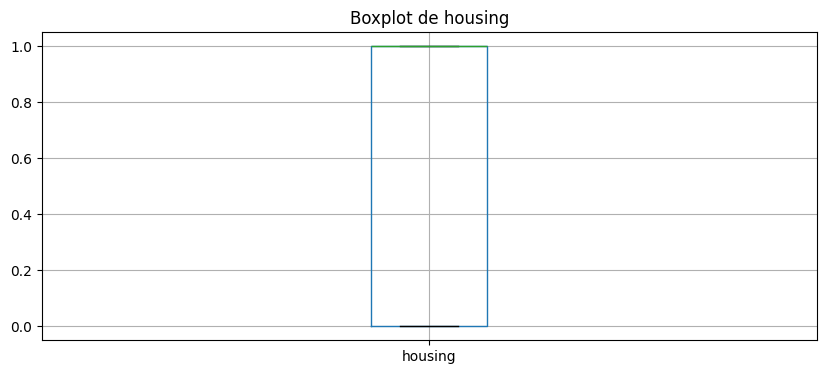

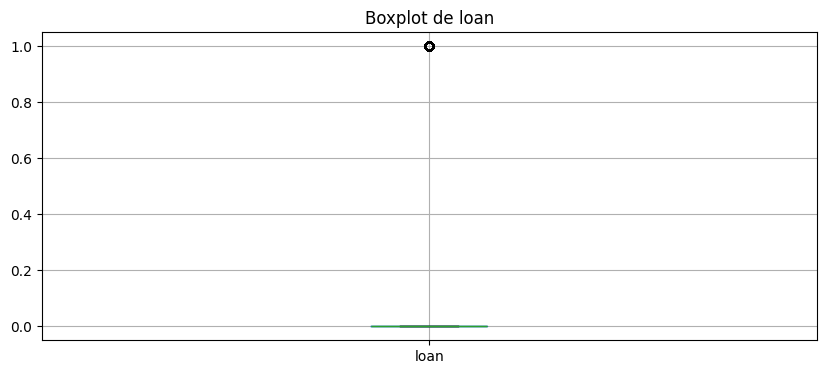

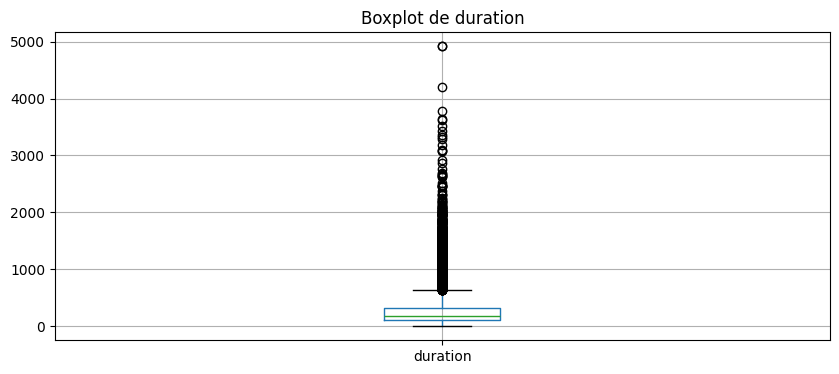

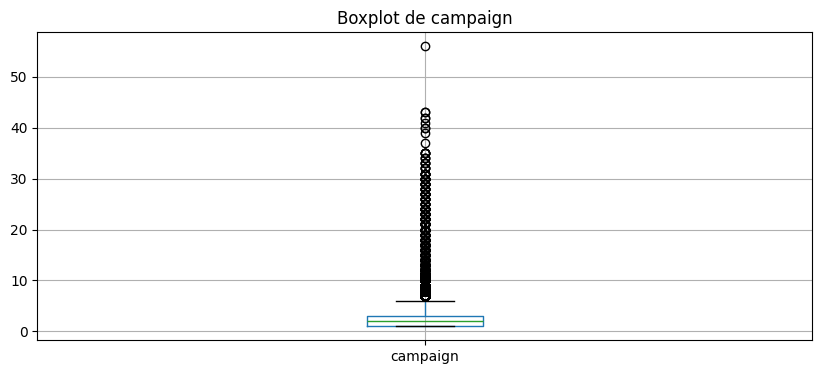

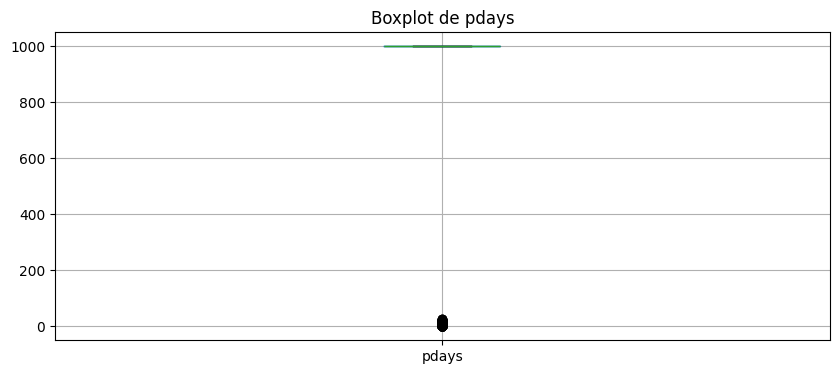

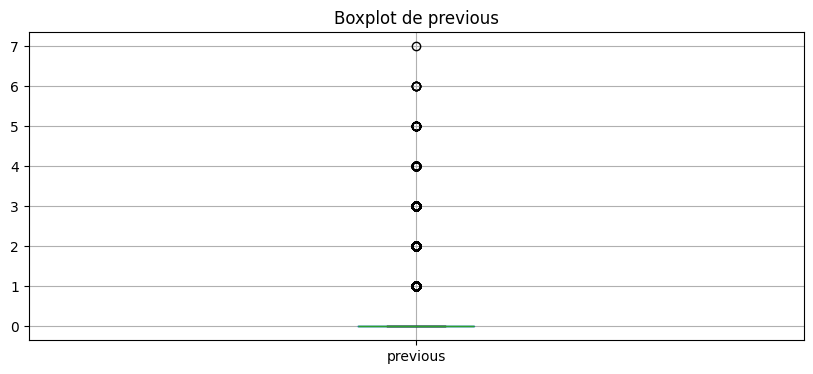

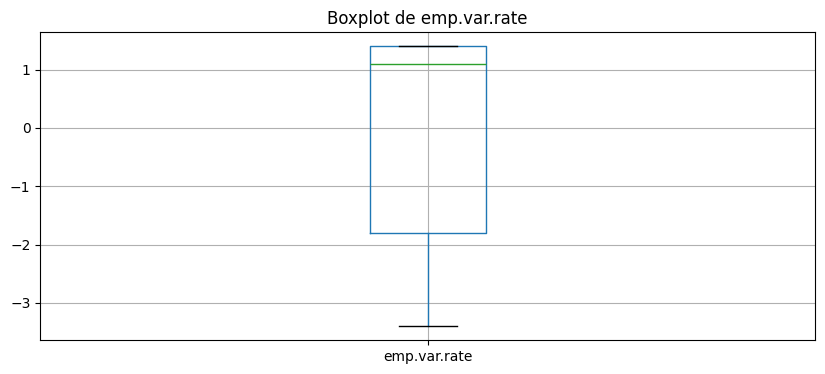

In [43]:
# Identificación de outliers mediante boxplots (dataset bank)
columnas_numericas_bank = bank.select_dtypes(include='number').columns

for col in columnas_numericas_bank:
    plt.figure(figsize=(10,4))
    bank.boxplot(column=[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

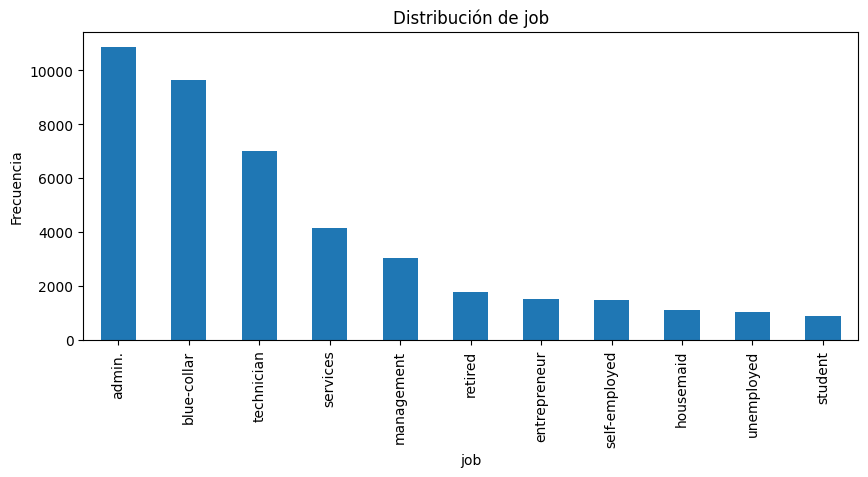

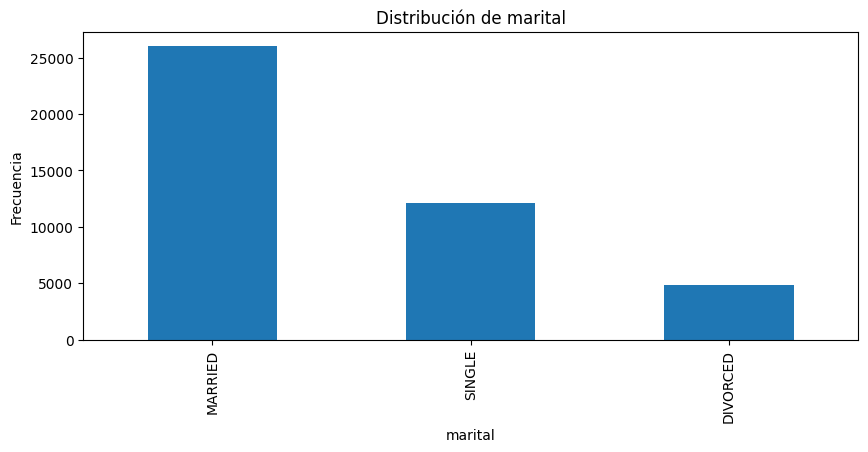

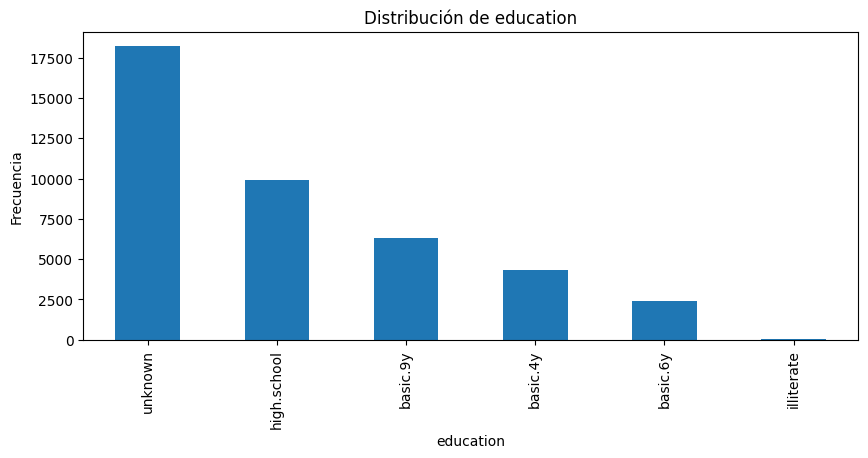

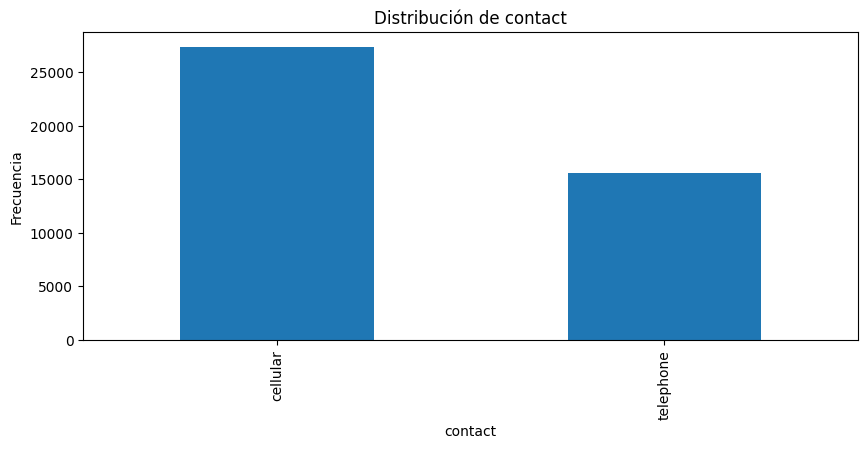

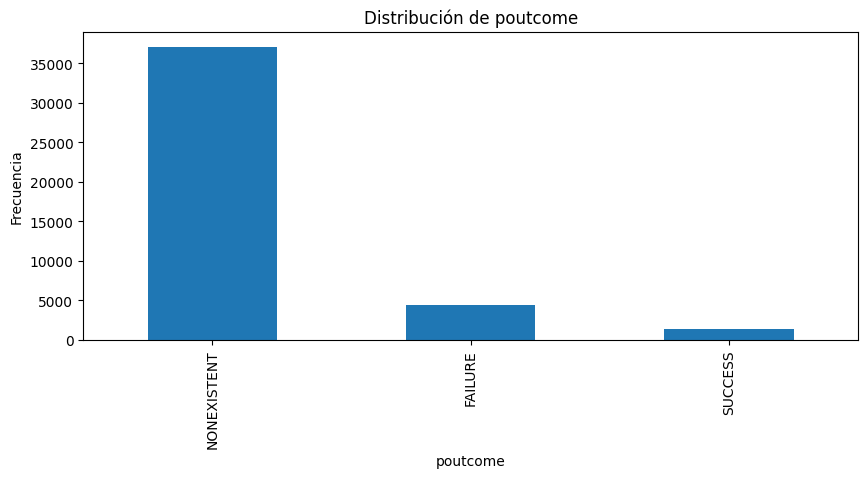

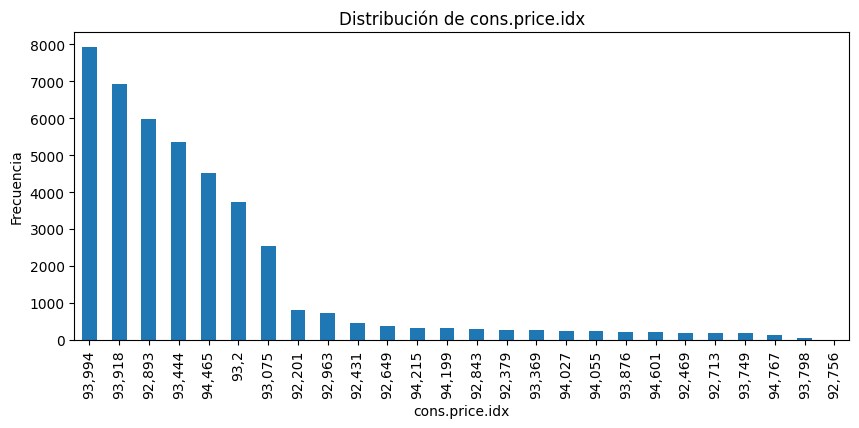

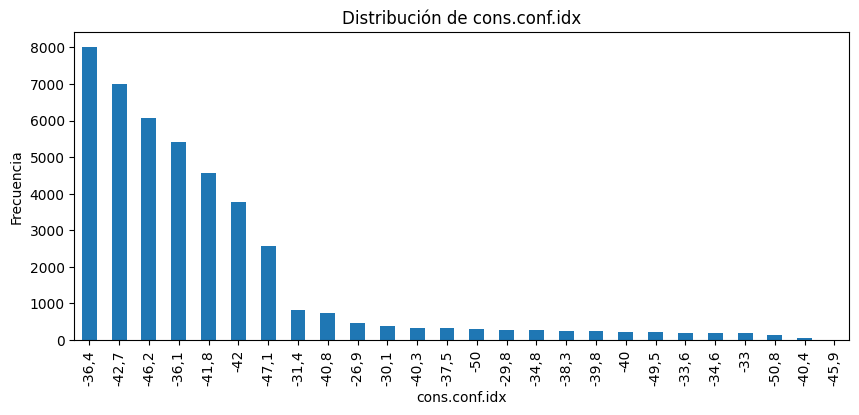

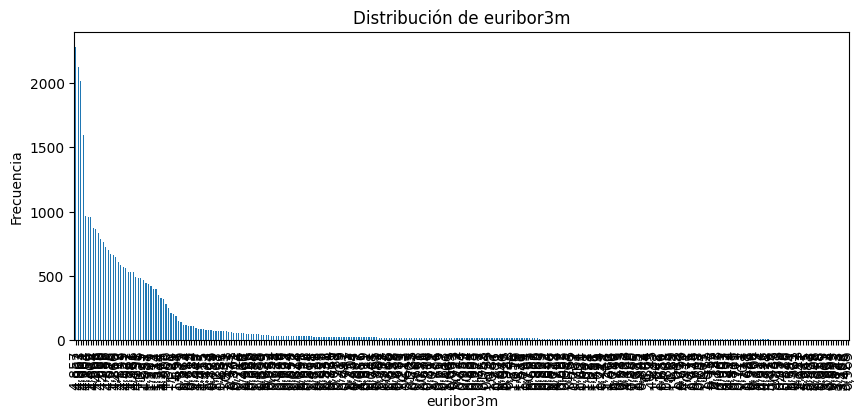

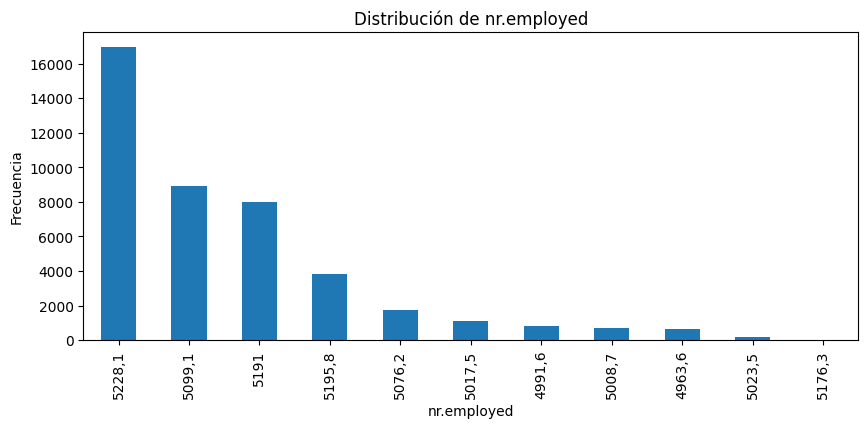

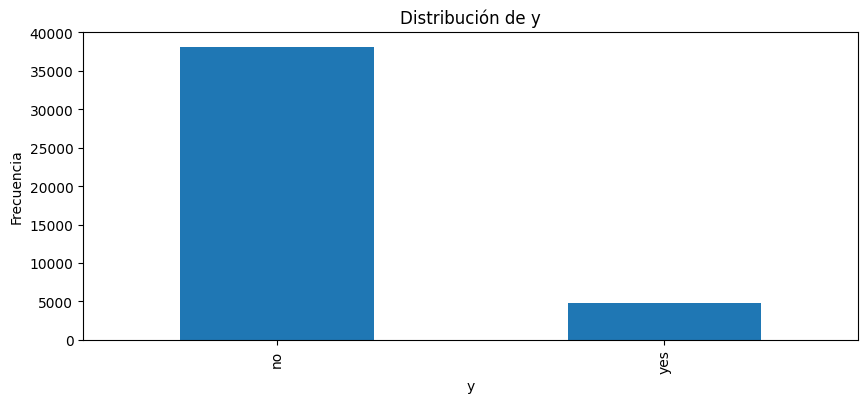

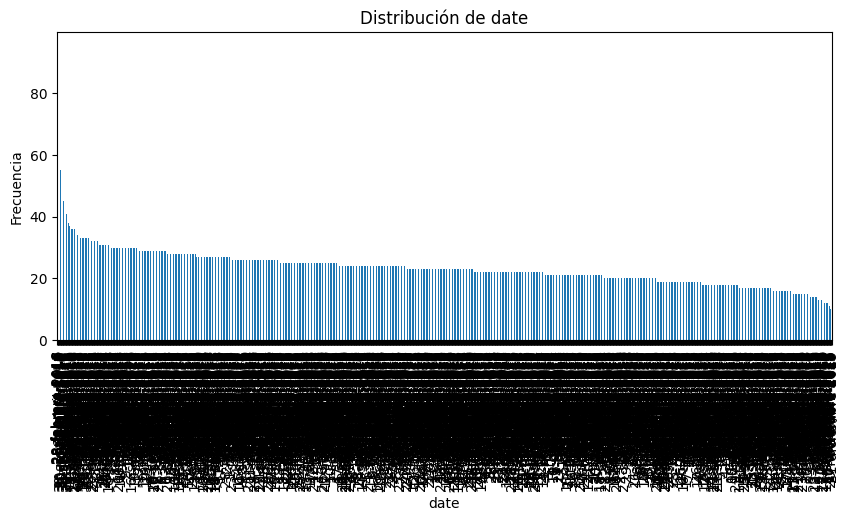

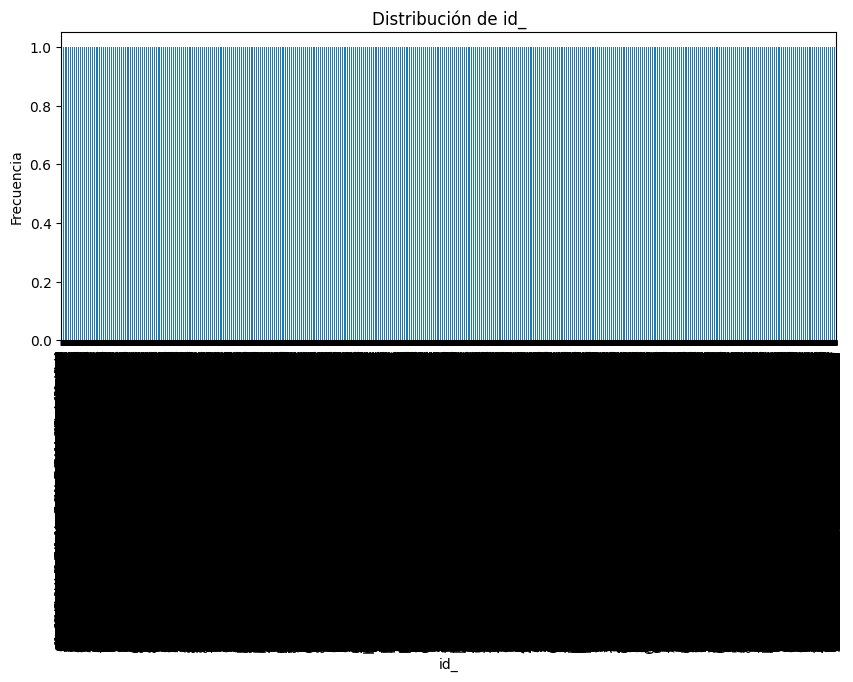

In [27]:
for col in bank.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 4))
    bank[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [28]:
clientes.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'ID'], dtype='object')

In [29]:
 clientes.drop(columns=['ID'], inplace=True)

In [30]:
clientes.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,0,161770,1,0,2012-04-04,29
1,1,85477,1,1,2012-12-30,7
2,2,147233,1,1,2012-02-02,5
3,3,121393,1,2,2012-12-21,29
4,4,63164,1,2,2012-06-20,20


In [31]:
clientes.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
count,43170.000000,43170.000000,43170.000000,43170.000000,43170,43170.000000
mean,7916.022469,93227.389622,1.004749,0.998633,2013-05-11 22:09:47.407922176,16.591290
min,0.000000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000
25%,3597.000000,49608.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000
50%,7194.500000,93009.500000,1.000000,1.000000,2013-03-01 00:00:00,17.000000
75%,11705.750000,136740.500000,2.000000,2.000000,2014-03-28 00:00:00,25.000000
max,20114.000000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000
std,5228.248885,50498.181989,0.815996,0.816008,NaN,9.241769


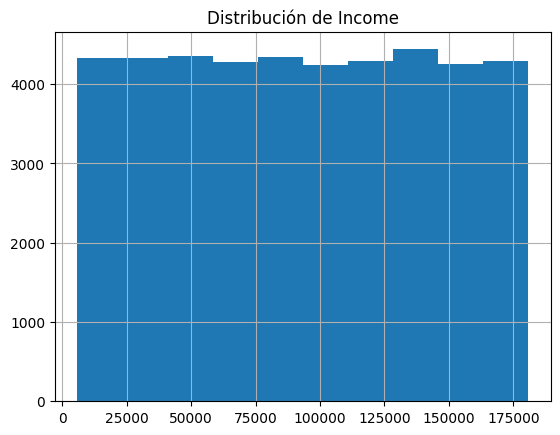

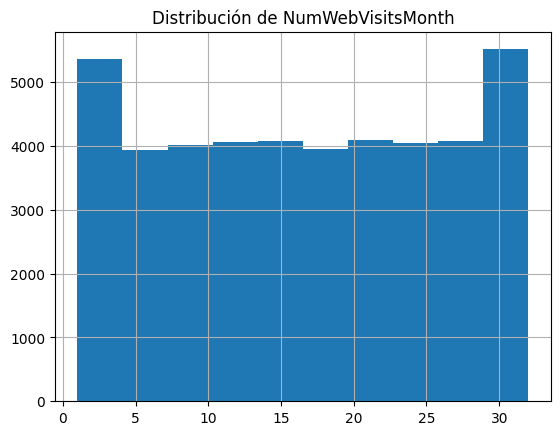

In [32]:
clientes['Income'].hist()
plt.title('Distribución de Income')
plt.show()

clientes['NumWebVisitsMonth'].hist()
plt.title('Distribución de NumWebVisitsMonth')
plt.show()

In [33]:
clientes.drop(columns=['Dt_Customer'], inplace=True)

In [34]:
clientes.head(10)

,Unnamed: 0,Income,Kidhome,Teenhome,NumWebVisitsMonth
0,0,161770,1,0,29
1,1,85477,1,1,7
2,2,147233,1,1,5
3,3,121393,1,2,29
4,4,63164,1,2,20
5,5,143854,0,1,26
6,6,76439,1,0,3
7,7,159686,1,1,21
8,8,179933,0,0,18
9,9,77504,1,0,18


In [36]:
# Eliminamos la columna Unnamed: 0 porque es solo un índice
clientes.drop(columns=['Unnamed: 0'], inplace=True)

In [37]:
clientes.describe()

,Income,Kidhome,Teenhome,NumWebVisitsMonth
count,43170.000000,43170.000000,43170.000000,43170.000000
mean,93227.389622,1.004749,0.998633,16.591290
std,50498.181989,0.815996,0.816008,9.241769
min,5841.000000,0.000000,0.000000,1.000000
25%,49608.000000,0.000000,0.000000,9.000000
50%,93009.500000,1.000000,1.000000,17.000000
75%,136740.500000,2.000000,2.000000,25.000000
max,180802.000000,2.000000,2.000000,32.000000


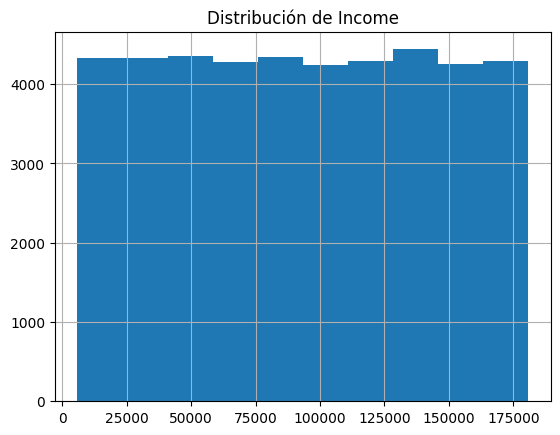

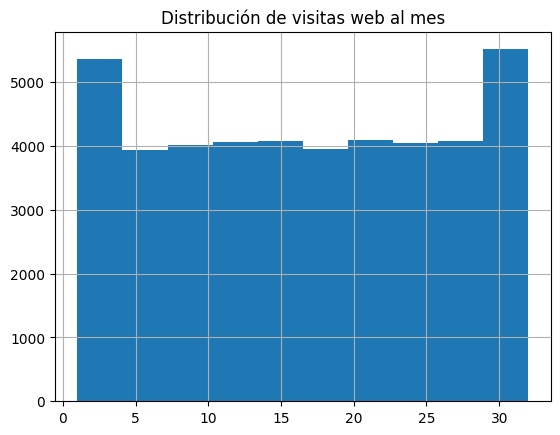

In [38]:
clientes['Income'].hist()
plt.title('Distribución de Income')
plt.show()

clientes['NumWebVisitsMonth'].hist()
plt.title('Distribución de visitas web al mes')
plt.show()

In [39]:
# Identificamos columnas categóricas
clientes_categoricas = clientes.select_dtypes(include='object').columns
clientes_categoricas

Index([], dtype='object')

In [40]:
for col in clientes_categoricas:
    print(f"\n---- {col} ----")
    print(clientes[col].value_counts())

In [41]:
for col in clientes_categoricas:
    plt.figure(figsize=(10,4))
    clientes[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

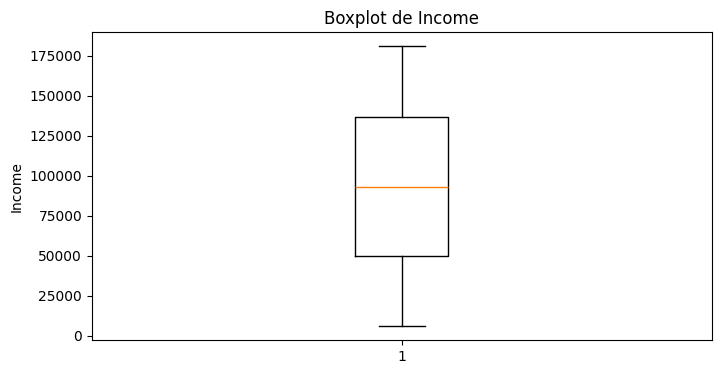

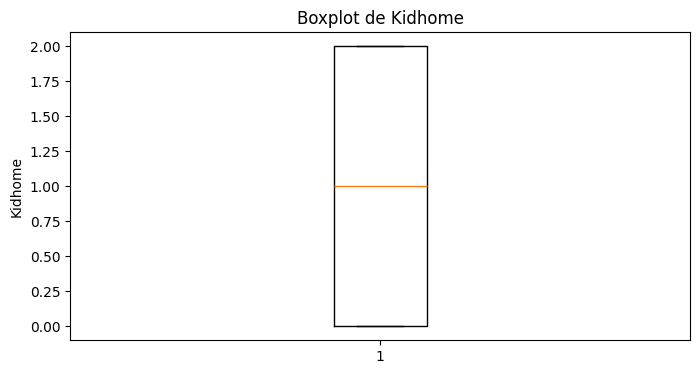

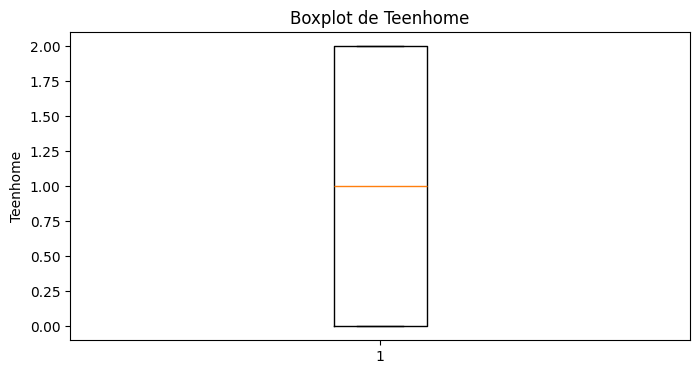

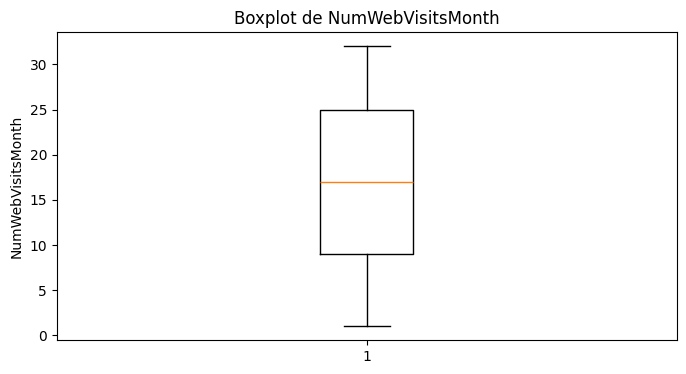

In [42]:
 # Revisamos outliers en las columnas numéricas del dataset clientes
for col in clientes.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,4))
    plt.boxplot(clientes[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

In [48]:
bank = pd.read_csv('../data/bank-additional-limpio.csv', sep=';')
bank.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


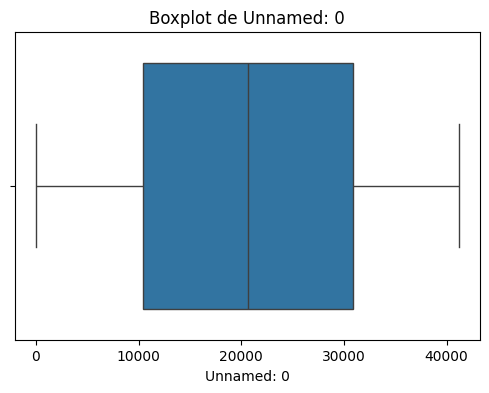

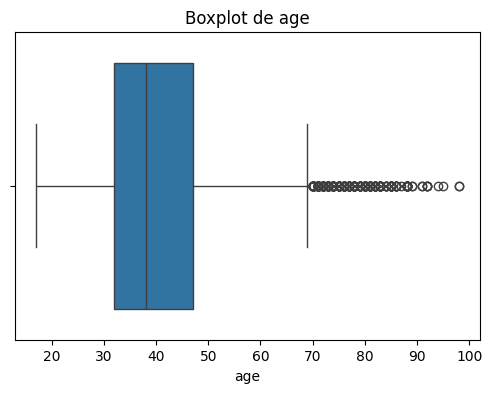

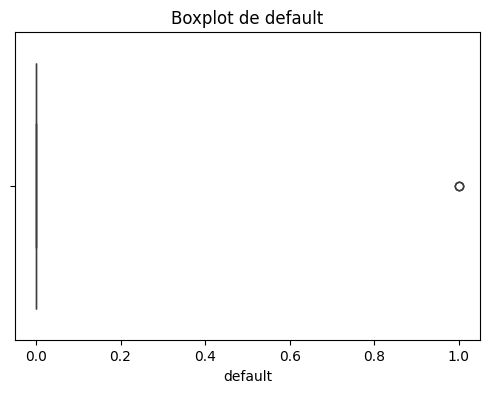

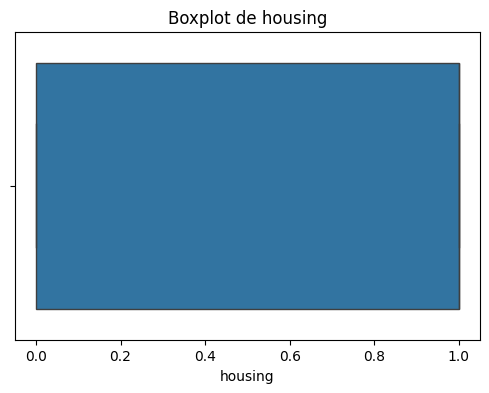

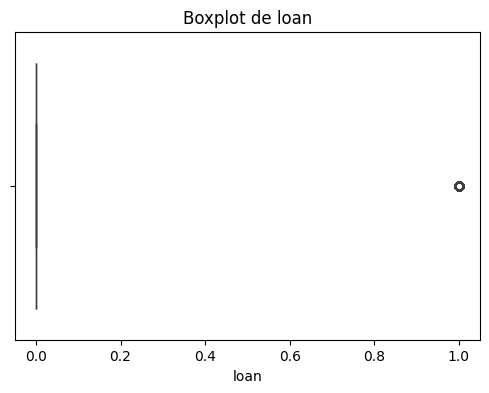

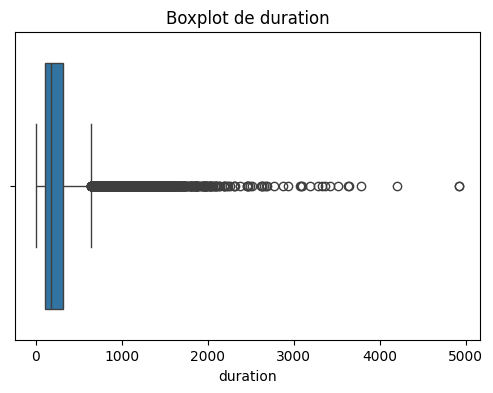

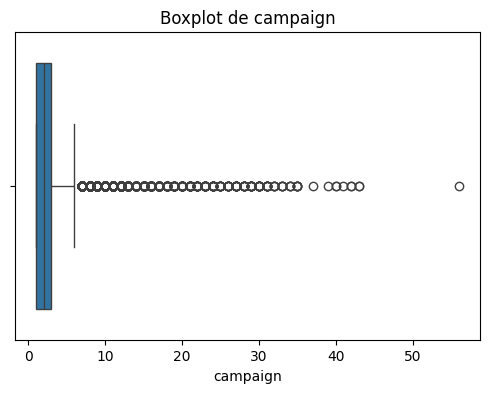

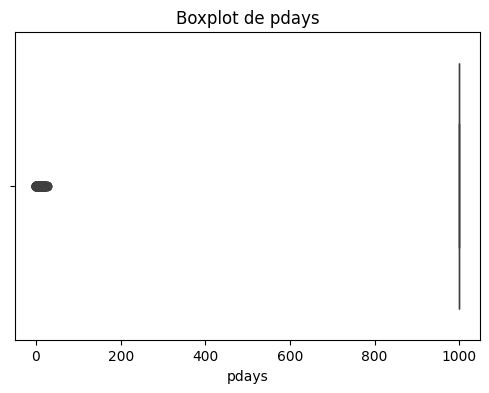

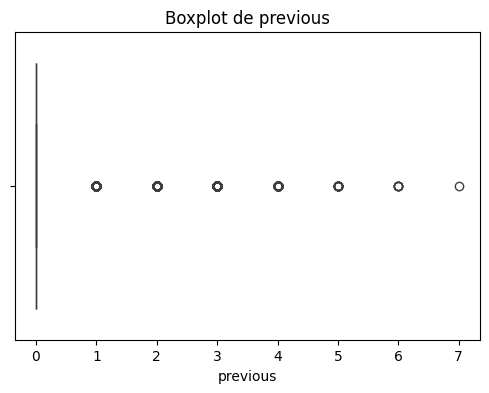

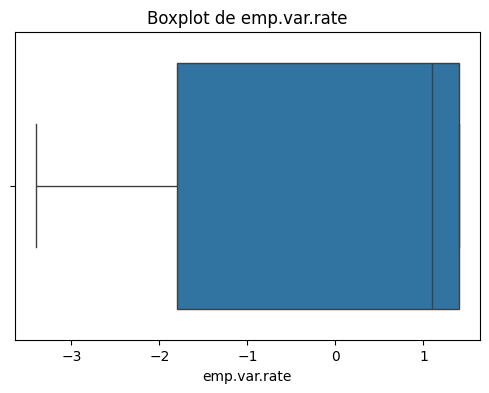

In [49]:
# Revisamos outliers en las columnas numéricas del dataset bank
for col in bank.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=bank[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

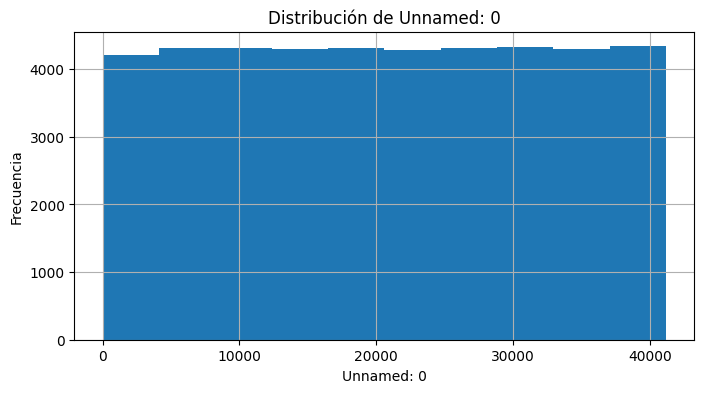

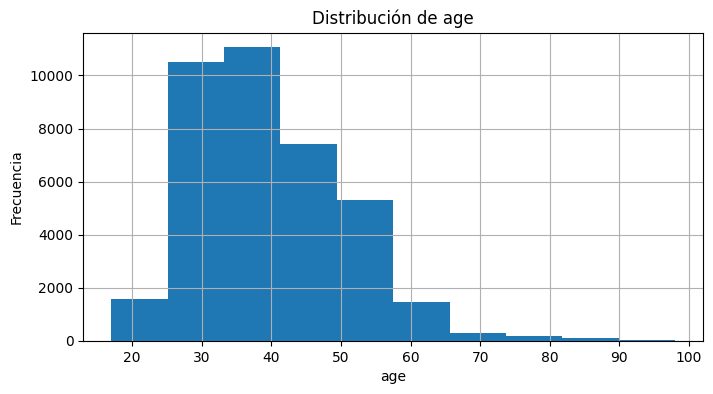

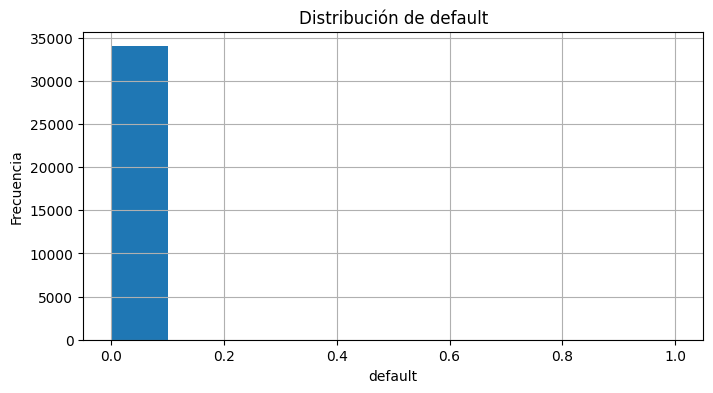

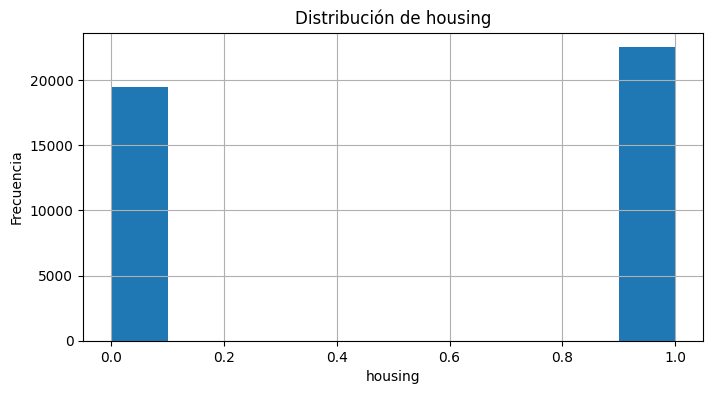

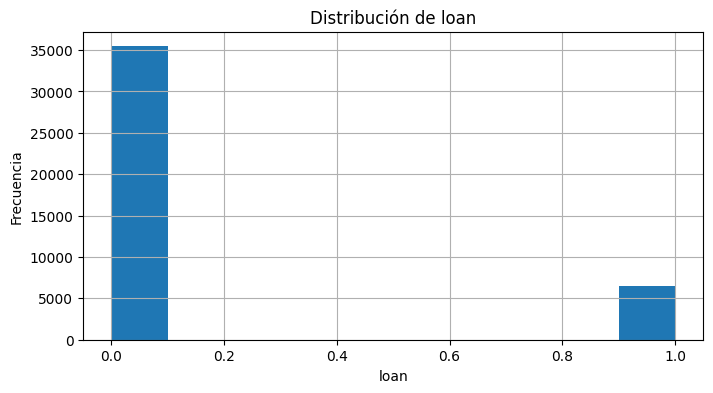

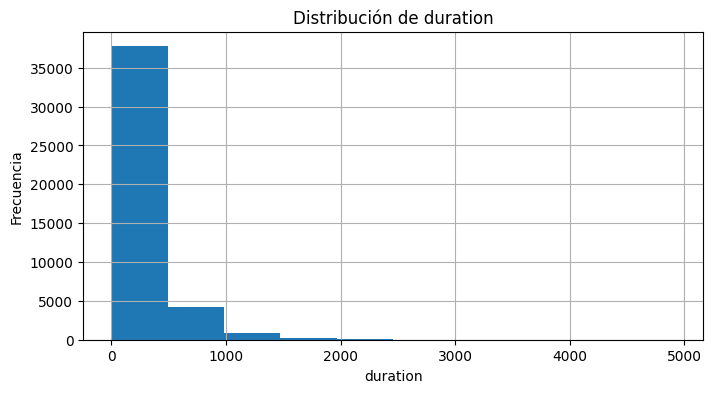

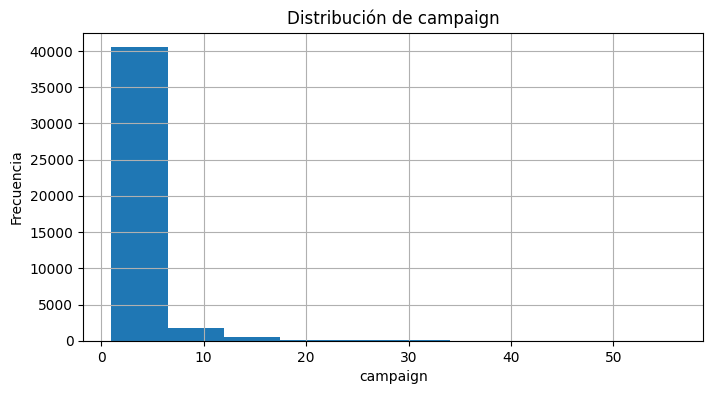

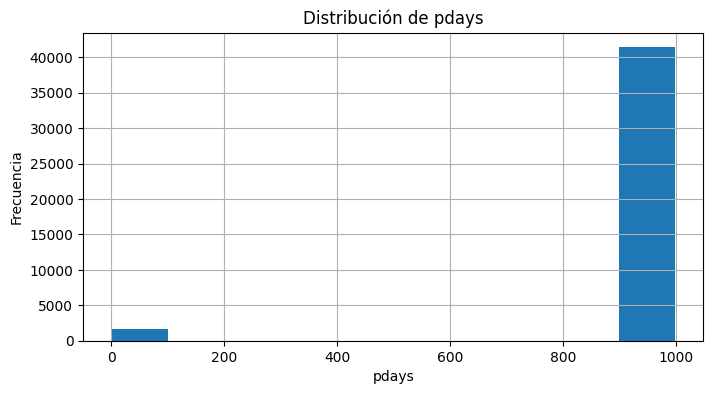

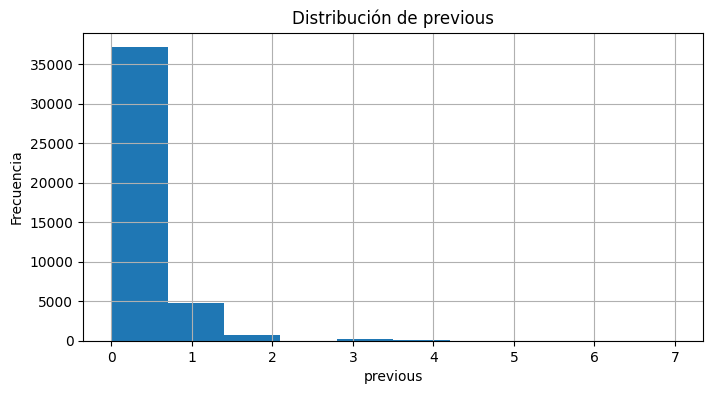

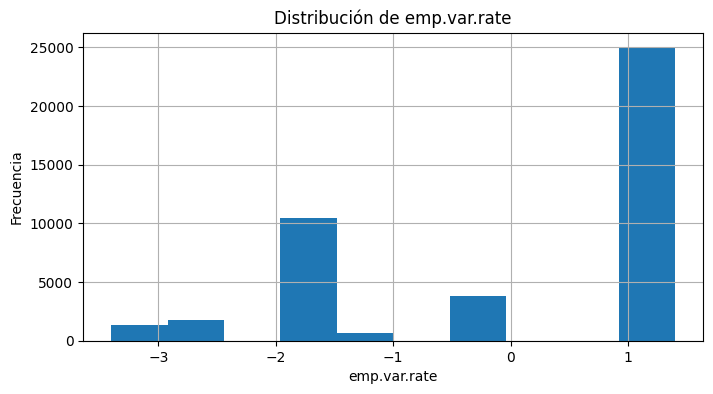

In [50]:
 # Distribución de las columnas numéricas del dataset bank
for col in bank.select_dtypes(include='number').columns:
    plt.figure(figsize=(8,4))
    bank[col].hist()
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [51]:
# Identificamos columnas categóricas en bank
bank_categoricas = bank.select_dtypes(include='object').columns
bank_categoricas

Index(['job', 'marital', 'education', 'contact', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

In [52]:
for col in bank_categoricas:
    print(f"\n---- {col} ----")
    print(bank[col].value_counts())


---- job ----
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

---- marital ----
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64

---- education ----
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

---- contact ----
contact
cellular     27396
telephone    15604
Name: count, dtype: int64

---- poutcome ----
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

---- cons.price.idx ----
cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      

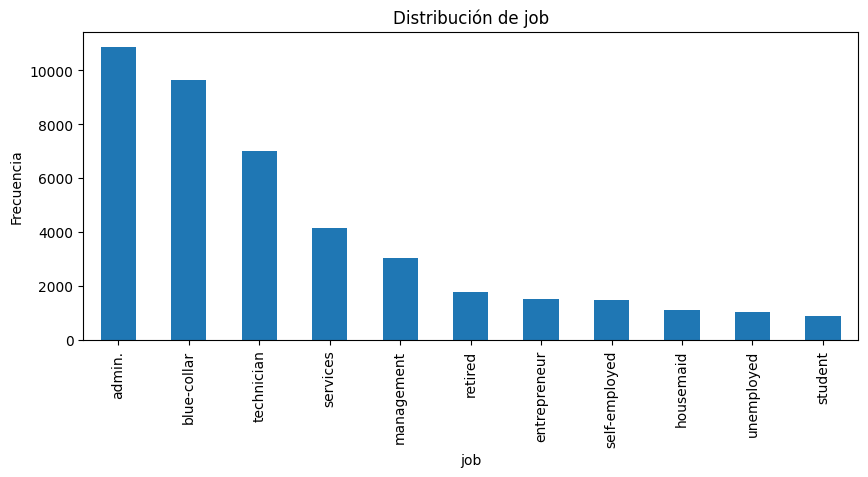

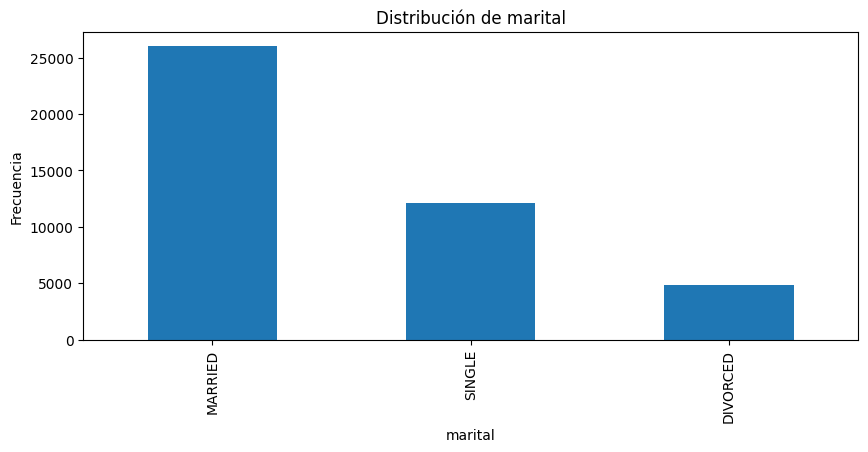

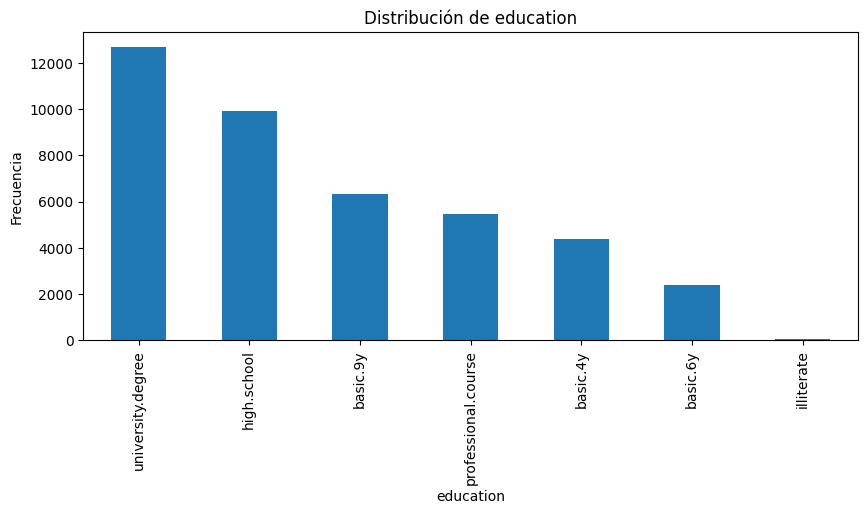

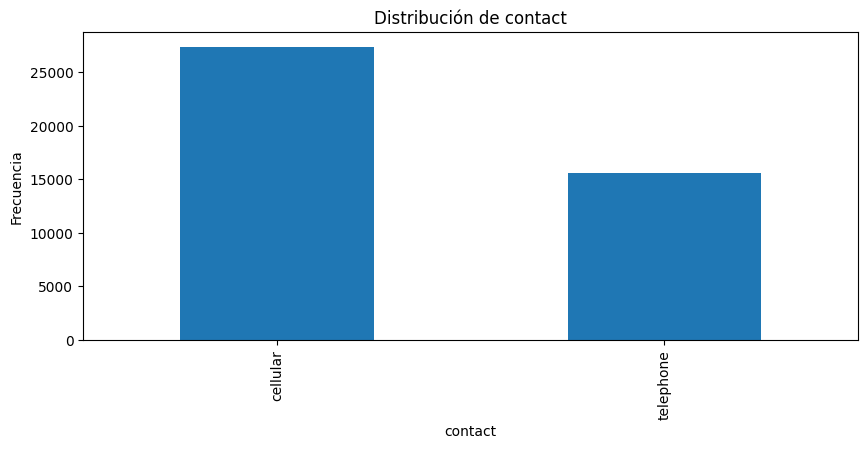

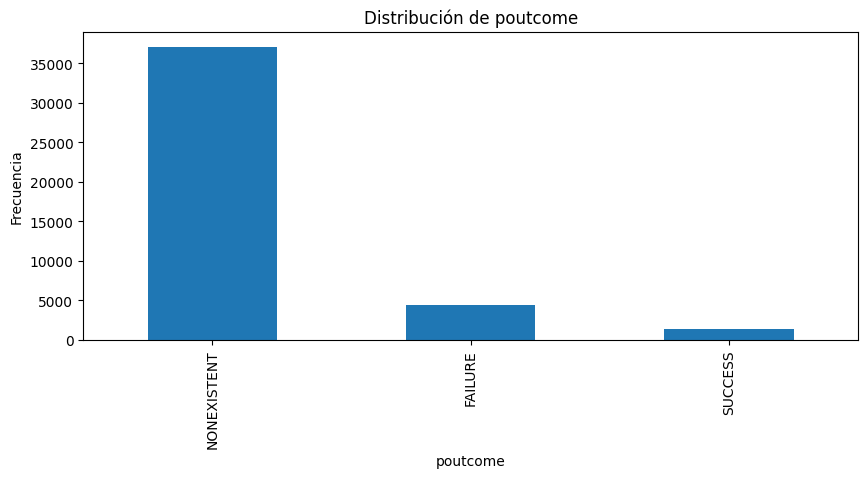

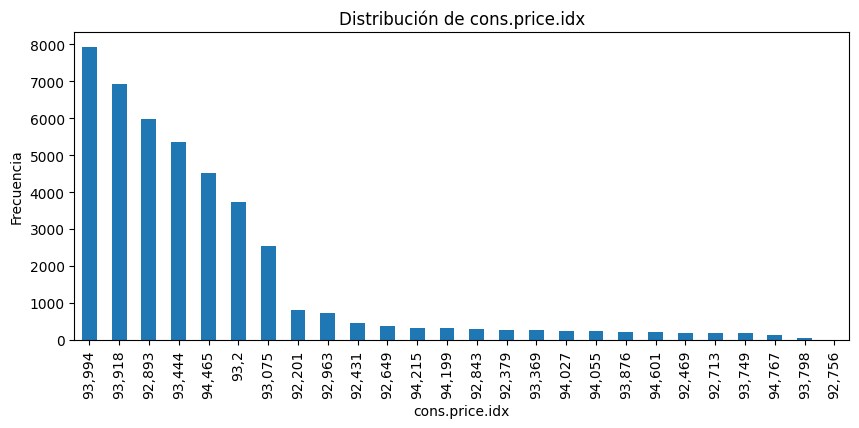

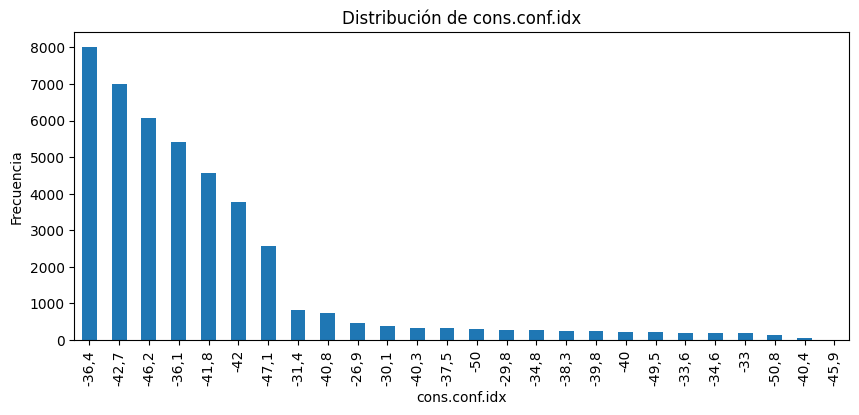

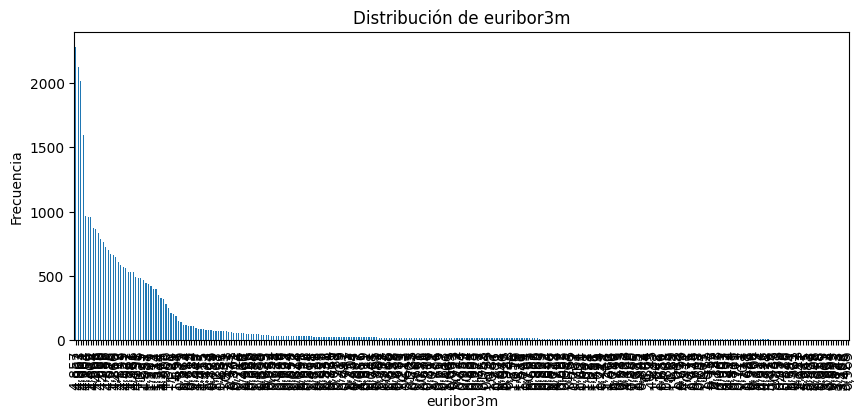

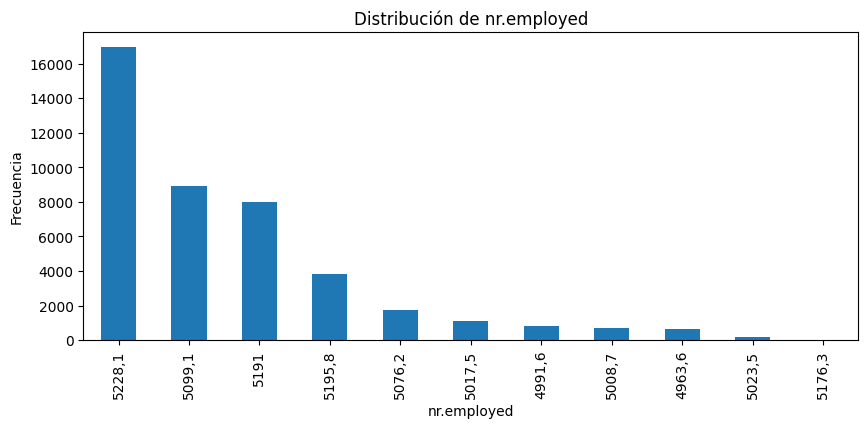

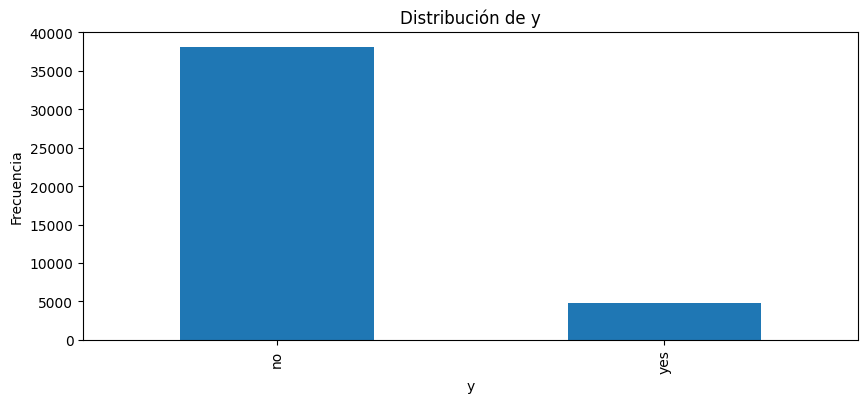

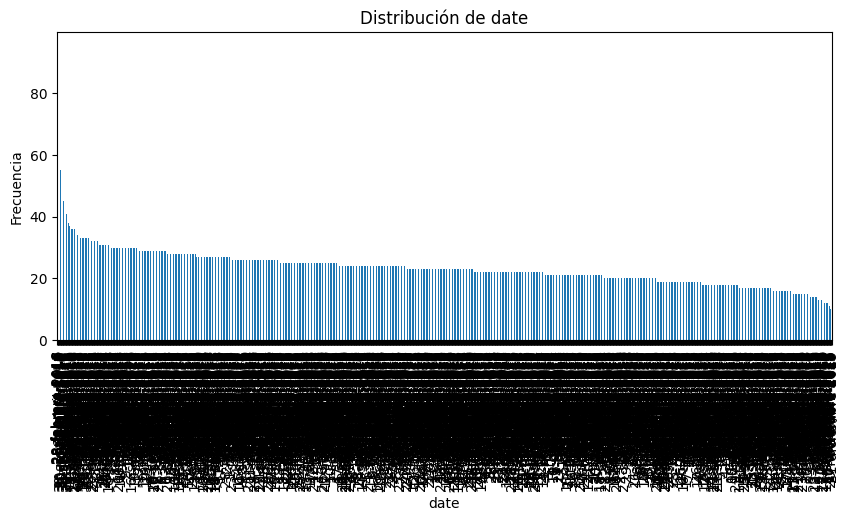

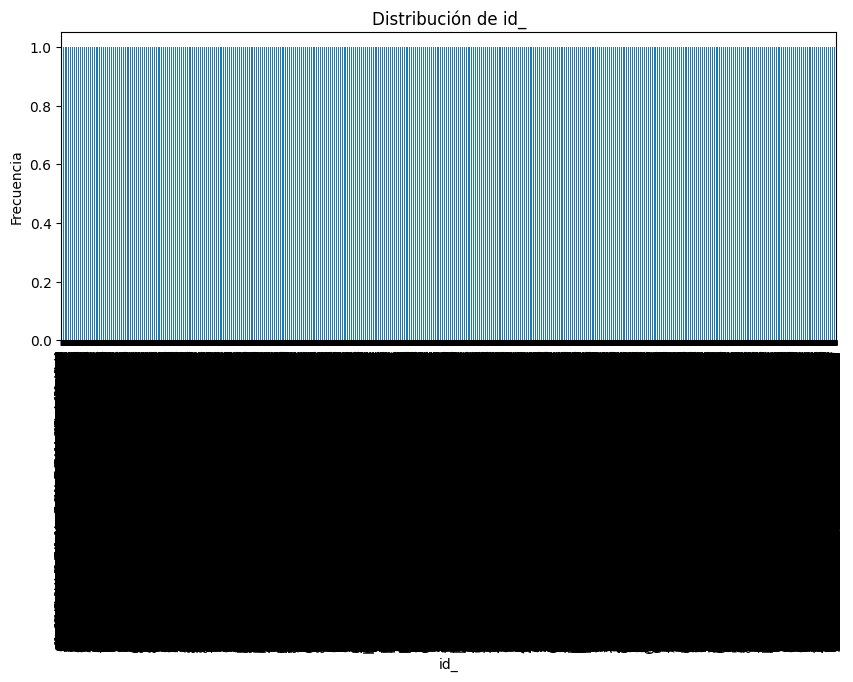

In [53]:
for col in bank_categoricas:
    plt.figure(figsize=(10,4))
    bank[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Dataset clientes

Tras revisar este dataset, las variables numéricas muestran valores coherentes con lo que esperábamos. En Income aparecen valores altos que pueden considerarse outliers, pero son habituales en datos de ingresos. Las variables Kidhome y Teenhome están concentradas sobre todo en 0 y 1, lo cual tiene sentido. También revisamos NumWebVisitsMonth, donde hay algunos valores elevados, pero sin errores aparentes. En general, no se observan problemas importantes en la calidad de los datos.

Dataset bank additional

En este dataset se detectan algunos valores extremos en variables como age, duration, campaign, pdays o previous. Estos outliers son normales en el contexto de campañas comerciales, ya que algunos clientes pueden haber sido contactados muchas veces o haber tenido llamadas muy largas. Las variables categóricas también están desbalanceadas, tal y como suele pasar en datos reales. La matriz de correlación no muestra relaciones fuertes entre las variables, por lo que no hay dependencias destacables.

Resumen general

En los dos datasets no aparecen errores graves y los outliers encontrados son razonables según el tipo de información. El análisis está completo y deja los datos preparados para cualquier fase posterior del proyecto.